In [1]:
import os
import pandas as pd
import numpy as np
import math
import datetime as dt
import matplotlib.pyplot as plt


from sklearn.metrics import mean_squared_error, mean_absolute_error, explained_variance_score, r2_score 
from sklearn.metrics import mean_poisson_deviance, mean_gamma_deviance, accuracy_score
from sklearn.preprocessing import MinMaxScaler



import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.layers import SimpleRNN, LSTM


In [2]:
dataset1=pd.read_csv('./Bitcoin_data.csv')

<h2>EDA</h2>

In [3]:
print('Total number of days ',len(dataset1))
print('No. of columns: ',dataset1.shape[1],"=>")
dataset1.columns

Total number of days  2713
No. of columns:  7 =>


Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')

In [4]:
dataset1.shape

(2713, 7)

In [5]:
dataset1.head(10)

Date        Open        High         Low       Close   Adj Close  \
0  2014-09-17  465.864014  468.174011  452.421997  457.334015  457.334015   
1  2014-09-18  456.859985  456.859985  413.104004  424.440002  424.440002   
2  2014-09-19  424.102997  427.834991  384.532013  394.795990  394.795990   
3  2014-09-20  394.673004  423.295990  389.882996  408.903992  408.903992   
4  2014-09-21  408.084991  412.425995  393.181000  398.821014  398.821014   
5  2014-09-22  399.100006  406.915985  397.130005  402.152008  402.152008   
6  2014-09-23  402.092010  441.557007  396.196991  435.790985  435.790985   
7  2014-09-24  435.751007  436.112000  421.131989  423.204987  423.204987   
8  2014-09-25  423.156006  423.519989  409.467987  411.574005  411.574005   
9  2014-09-26  411.428986  414.937988  400.009003  404.424988  404.424988   

     Volume  
0  21056800  
1  34483200  
2  37919700  
3  36863600  
4  26580100  
5  24127600  
6  45099500  
7  30627700  
8  26814400  
9  21460800

In [6]:
dataset1.tail()

Date          Open          High           Low         Close  \
2708  2022-02-15  42586.464844  44667.218750  42491.035156  44575.203125   
2709  2022-02-16  44578.277344  44578.277344  43456.691406  43961.859375   
2710  2022-02-17  43937.070313  44132.972656  40249.371094  40538.011719   
2711  2022-02-18  40552.132813  40929.152344  39637.617188  40030.976563   
2712  2022-02-19  40022.132813  40246.027344  40010.867188  40126.429688   

         Adj Close       Volume  
2708  44575.203125  22721659051  
2709  43961.859375  19792547657  
2710  40538.011719  26246662813  
2711  40030.976563  23310007704  
2712  40126.429688  22263900160

In [7]:
dataset1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2713 entries, 0 to 2712
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       2713 non-null   object 
 1   Open       2713 non-null   float64
 2   High       2713 non-null   float64
 3   Low        2713 non-null   float64
 4   Close      2713 non-null   float64
 5   Adj Close  2713 non-null   float64
 6   Volume     2713 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 148.5+ KB


In [8]:
dataset1.describe()

Open          High           Low         Close     Adj Close  \
count   2713.000000   2713.000000   2713.000000   2713.000000   2713.000000   
mean   11311.041069  11614.292482  10975.555057  11323.914637  11323.914637   
std    16106.428891  16537.390649  15608.572560  16110.365010  16110.365010   
min      176.897003    211.731003    171.509995    178.102997    178.102997   
25%      606.396973    609.260986    604.109985    606.718994    606.718994   
50%     6301.569824   6434.617676   6214.220215   6317.609863   6317.609863   
75%    10452.399414  10762.644531  10202.387695  10462.259766  10462.259766   
max    67549.734375  68789.625000  66382.062500  67566.828125  67566.828125   

             Volume  
count  2.713000e+03  
mean   1.470462e+10  
std    2.001627e+10  
min    5.914570e+06  
25%    7.991080e+07  
50%    5.098183e+09  
75%    2.456992e+10  
max    3.509679e+11

In [9]:
print('No. of Null Values:',dataset1.isnull().values.sum())
print('NA values:',dataset1.isnull().values.any())

No. of Null Values: 0
NA values: False


In [10]:
# Printing the start date and End date of the dataset
print('Starting Date',dataset1.iloc[0][0])
print('Ending Date',dataset1.iloc[-1][0])


Starting Date 2014-09-17
Ending Date 2022-02-19


# Overall Analysis from 2014-2022

In [11]:
dataset1['Date'] = pd.to_datetime(dataset1['Date'], format='%Y-%m-%d')

y_overall = dataset1.loc[(dataset1['Date'] >= '2014-09-17')
                     & (dataset1['Date'] <= '2022-02-19')]

y_overall.drop(y_overall[['Adj Close','Volume']],axis=1)

Date          Open          High           Low         Close
0    2014-09-17    465.864014    468.174011    452.421997    457.334015
1    2014-09-18    456.859985    456.859985    413.104004    424.440002
2    2014-09-19    424.102997    427.834991    384.532013    394.795990
3    2014-09-20    394.673004    423.295990    389.882996    408.903992
4    2014-09-21    408.084991    412.425995    393.181000    398.821014
...         ...           ...           ...           ...           ...
2708 2022-02-15  42586.464844  44667.218750  42491.035156  44575.203125
2709 2022-02-16  44578.277344  44578.277344  43456.691406  43961.859375
2710 2022-02-17  43937.070313  44132.972656  40249.371094  40538.011719
2711 2022-02-18  40552.132813  40929.152344  39637.617188  40030.976563
2712 2022-02-19  40022.132813  40246.027344  40010.867188  40126.429688

[2713 rows x 5 columns]

In [12]:
monthvise= y_overall.groupby(y_overall['Date'].dt.strftime('%B'))[['Open','Close']].mean()
new_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 
             'September', 'October', 'November', 'December']
monthvise = monthvise.reindex(new_order, axis=0)
monthvise

Open         Close
Date                                 
January    12855.131425  12828.374881
February   12773.077824  12837.802432
March      10918.895761  10957.226324
April      11338.448900  11359.962198
May        10659.455257  10580.209317
June        9299.305977   9294.420703
July        9285.402500   9330.128271
August     11312.971706  11345.157739
September  10489.365578  10462.378150
October    11321.578327  11416.077925
November   12542.362183  12537.441752
December   12391.975010  12391.988926

# Building LSTM Model

In [13]:
# Lets First Take all the Close Price 
closedf = dataset1[['Date','Close']]
print("Shape of close dataframe:", closedf.shape)

Shape of close dataframe: (2713, 2)


In [14]:
import matplotlib.pyplot as plt
from itertools import cycle
import plotly.graph_objects as go
import plotly.express as px
from plotly.subplots import make_subplots
fig = px.line(closedf, x=closedf.Date, y=closedf.Close,labels={'date':'Date','close':'Close Stock'})
fig.update_traces(marker_line_width=2, opacity=0.8, marker_line_color='orange')
fig.update_layout(title_text='Whole period of timeframe of Bitcoin close price 2014-2020', plot_bgcolor='white', 
                  font_size=15, font_color='black')
fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)
fig.show()

### Taking the data between Feburary 2018 and Feburary 2019

In [15]:
closedf = closedf[(closedf['Date'] > '2018-02-20') & (closedf['Date'] < '2019-02-20')]
close_stock = closedf.copy()
print("Total data for prediction: ",closedf.shape[0])
print(type(closedf))

Total data for prediction:  364
<class 'pandas.core.frame.DataFrame'>


In [16]:
fig = px.line(closedf, x=closedf.Date, y=closedf.Close,labels={'date':'Date','close':'Close Stock'})
fig.update_traces(marker_line_width=2, opacity=0.8, marker_line_color='orange')
fig.update_layout(title_text='Considered period to predict Bitcoin close price', 
                  plot_bgcolor='white', font_size=15, font_color='black')
fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)
fig.show()

In [17]:
# deleting date column and normalizing using MinMax Scaler
closedf = closedf.drop('Date', axis =1)

#Scakling the data between 0 and 1
scaler=MinMaxScaler(feature_range=(0,1))
closedf=scaler.fit_transform(np.array(closedf).reshape(-1,1))
print(closedf.shape)

(364, 1)


* ### Slicing data into Training set and Testing set

In [18]:
# we keep the training set as 70% and 30% testing set
training_size=int(len(closedf)*0.70)
test_size=len(closedf)-training_size
train_data,test_data=closedf[0:training_size,:],closedf[training_size:len(closedf),:1]
print("train_data: ", train_data.shape)
print("test_data: ", test_data.shape)

train_data:  (254, 1)
test_data:  (110, 1)


* ### Now we Transform the Close price based on Time-series-analysis forecasting requirement , Here we will take 20   

In [19]:
# convert an array of values into a dataset matrix

def create_dataset(dataset, time_step=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-time_step-1):
        a = dataset[i:(i+time_step), 0]   ###i=0, 0,1,2,3-----99   100 
        dataX.append(a)
        dataY.append(dataset[i + time_step, 0])
    return np.array(dataX), np.array(dataY)

In [20]:
time_step = 20
X_train, y_train = create_dataset(train_data, time_step)
X_test, y_test = create_dataset(test_data, time_step)

print("X_train: ", X_train.shape)
print("y_train: ", y_train.shape)
print("X_test: ", X_test.shape)
print("y_test", y_test.shape)

X_train:  (233, 20)
y_train:  (233,)
X_test:  (89, 20)
y_test (89,)


In [21]:
# reshape input to be [samples, time steps, features] which is required for LSTM
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

print("X_train: ", X_train.shape)
print("X_test: ", X_test.shape)

X_train:  (233, 20, 1)
X_test:  (89, 20, 1)


In [22]:
model=Sequential()

model.add(LSTM(5,input_shape=(None,1),activation="relu"))

model.add(LSTM(5,input_shape=(None,1),activation="relu"))

model.add(Dense(1))

model.compile(loss="mean_squared_error",optimizer="adam")

ValueError: Input 0 of layer "lstm_1" is incompatible with the layer: expected ndim=3, found ndim=2. Full shape received: (None, 5)

In [ ]:
history = model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=200,batch_size=32,verbose=1)

Epoch 1/200
8/8 [==============================] - 3s 70ms/step - loss: 0.3805 - val_loss: 0.0039
Epoch 2/200
8/8 [==============================] - 0s 17ms/step - loss: 0.3227 - val_loss: 0.0021
Epoch 3/200
8/8 [==============================] - 0s 17ms/step - loss: 0.2738 - val_loss: 0.0011
Epoch 4/200
8/8 [==============================] - 0s 18ms/step - loss: 0.2307 - val_loss: 0.0010
Epoch 5/200
8/8 [==============================] - 0s 16ms/step - loss: 0.1911 - val_loss: 0.0020
Epoch 6/200
8/8 [==============================] - 0s 17ms/step - loss: 0.1567 - val_loss: 0.0042
Epoch 7/200
8/8 [==============================] - 0s 18ms/step - loss: 0.1244 - val_loss: 0.0079
Epoch 8/200
8/8 [==============================] - 0s 16ms/step - loss: 0.0937 - val_loss: 0.0137
Epoch 9/200
8/8 [==============================] - 0s 24ms/step - loss: 0.0639 - val_loss: 0.0227
Epoch 10/200
8/8 [==============================] - 0s 20ms/step - loss: 0.0364 - val_loss: 0.0367
Epoch 11/200
8/8 [=

- ### Plotting Loss vs Validation loss 

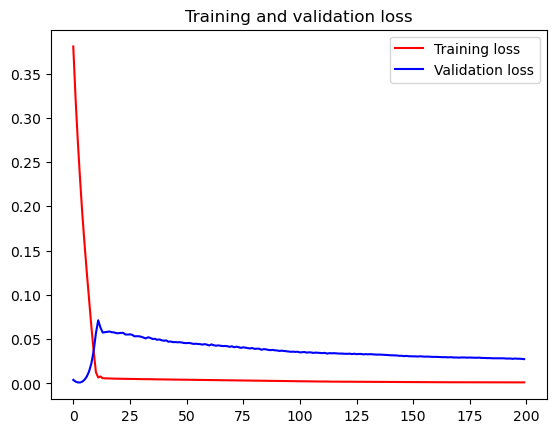

<Figure size 640x480 with 0 Axes>

In [ ]:
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(loss))

plt.plot(epochs, loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend(loc=0)
plt.figure()


plt.show()

In [ ]:
### Lets Do the prediction and check performance metrics
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)
train_predict.shape, test_predict.shape

3/3 [==============================] - 0s 4ms/step


((233, 1), (89, 1))

- # Model Evaluation

In [ ]:
# Transform back to original form

train_predict = scaler.inverse_transform(train_predict)
test_predict = scaler.inverse_transform(test_predict)
original_ytrain = scaler.inverse_transform(y_train.reshape(-1,1)) 
original_ytest = scaler.inverse_transform(y_test.reshape(-1,1)) 

- ## Evaluation metrices RMSE, MSE and MAE

In [ ]:
# Evaluation metrices RMSE and MAE
print("Train data RMSE: ", math.sqrt(mean_squared_error(original_ytrain,train_predict)))
print("Train data MSE: ", mean_squared_error(original_ytrain,train_predict))
print("Train data MAE: ", mean_absolute_error(original_ytrain,train_predict))
print("-------------------------------------------------------------------------------------")
print("Test data RMSE: ", math.sqrt(mean_squared_error(original_ytest,test_predict)))
print("Test data MSE: ", mean_squared_error(original_ytest,test_predict))
print("Test data MAE: ", mean_absolute_error(original_ytest,test_predict))

Train data RMSE:  279.99363342862654
Train data MSE:  78396.4347605641
Train data MAE:  205.5457308213519
-------------------------------------------------------------------------------------
Test data RMSE:  1380.4380395041894
Test data MSE:  1905609.18091017
Test data MAE:  1367.4575606839887


- ## Variance Regression Score

In [ ]:
print("Train data explained variance regression score:", 
      explained_variance_score(original_ytrain, train_predict))
print("Test data explained variance regression score:", 
      explained_variance_score(original_ytest, test_predict))

Train data explained variance regression score: 0.9163632238321747
Test data explained variance regression score: 0.42775651924619784


- ## R square score for regression

In [ ]:
print("Train data R2 score:", r2_score(original_ytrain, train_predict))
print("Test data R2 score:", r2_score(original_ytest, test_predict))

Train data R2 score: 0.9162726154017009
Test data R2 score: -29.571992798349914


- ## Regression Loss Mean Gamma deviance regression loss (MGD) and Mean Poisson deviance regression loss (MPD)

In [ ]:
print("Train data MGD: ", mean_gamma_deviance(original_ytrain, train_predict))
print("Test data MGD: ", mean_gamma_deviance(original_ytest, test_predict))
print("----------------------------------------------------------------------")
print("Train data MPD: ", mean_poisson_deviance(original_ytrain, train_predict))
print("Test data MPD: ", mean_poisson_deviance(original_ytest, test_predict))

Train data MGD:  0.0014147564566256152
Test data MGD:  0.09149893618591497
----------------------------------------------------------------------
Train data MPD:  10.458207843419837
Test data MPD:  416.08205816570575


- # Comparision of original stock close price and predicted close price

In [ ]:
# shift train predictions for plotting

look_back=time_step
trainPredictPlot = np.empty_like(closedf)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
print("Train predicted data: ", trainPredictPlot.shape)

# shift test predictions for plotting
testPredictPlot = np.empty_like(closedf)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(closedf)-1, :] = test_predict
print("Test predicted data: ", testPredictPlot.shape)

names = cycle(['Original close price','Train predicted close price','Test predicted close price'])


plotdf = pd.DataFrame({'date': close_stock['Date'],
                       'original_close': close_stock['Close'],
                      'train_predicted_close': trainPredictPlot.reshape(1,-1)[0].tolist(),
                      'test_predicted_close': testPredictPlot.reshape(1,-1)[0].tolist()})

fig = px.line(plotdf,x=plotdf['date'], y=[plotdf['original_close'],plotdf['train_predicted_close'],
                                          plotdf['test_predicted_close']],
              labels={'value':'Stock price','date': 'Date'})
fig.update_layout(title_text='Comparision between original close price vs predicted close price',
                  plot_bgcolor='white', font_size=15, font_color='black', legend_title_text='Close Price')
fig.for_each_trace(lambda t:  t.update(name = next(names)))

fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)
fig.show()

Train predicted data:  (364, 1)
Test predicted data:  (364, 1)


- # Predicting next 30 days

In [ ]:
x_input=test_data[len(test_data)-time_step:].reshape(1,-1)
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

from numpy import array

lst_output=[]
n_steps=time_step
i=0
pred_days = 30
while(i<pred_days):
    
    if(len(temp_input)>time_step):
        
        x_input=np.array(temp_input[1:])
        #print("{} day input {}".format(i,x_input))
        x_input = x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        
        yhat = model.predict(x_input, verbose=0)
        #print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
       
        lst_output.extend(yhat.tolist())
        i=i+1
        
    else:
        
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        temp_input.extend(yhat[0].tolist())
        
        lst_output.extend(yhat.tolist())
        i=i+1
               
print("Output of predicted next days: ", len(lst_output))

Output of predicted next days:  30


- # Plotting last 15 days of dataset and next predicted 30 days

In [ ]:
last_days=np.arange(1,time_step+1)
day_pred=np.arange(time_step+1,time_step+pred_days+1)
print(last_days)
print(day_pred)

[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20]
[21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44
 45 46 47 48 49 50]


In [ ]:
temp_mat = np.empty((len(last_days)+pred_days+1,1))
temp_mat[:] = np.nan
temp_mat = temp_mat.reshape(1,-1).tolist()[0]

last_original_days_value = temp_mat
next_predicted_days_value = temp_mat

last_original_days_value[0:time_step+1] = scaler.inverse_transform(closedf[len(closedf)-time_step:]).reshape(1,-1).tolist()[0]
next_predicted_days_value[time_step+1:] = scaler.inverse_transform(np.array(lst_output).reshape(-1,1)).reshape(1,-1).tolist()[0]

new_pred_plot = pd.DataFrame({
    'last_original_days_value':last_original_days_value,
    'next_predicted_days_value':next_predicted_days_value
})

names = cycle(['Last 15 days close price','Predicted next 30 days close price'])

fig = px.line(new_pred_plot,x=new_pred_plot.index, y=[new_pred_plot['last_original_days_value'],
                                                      new_pred_plot['next_predicted_days_value']],
              labels={'value': 'Stock price','index': 'Timestamp'})
fig.update_layout(title_text='Compare last 15 days vs next 30 days',
                  plot_bgcolor='white', font_size=15, font_color='black',legend_title_text='Close Price')

fig.for_each_trace(lambda t:  t.update(name = next(names)))
fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)
fig.show()



- # Plotting entire Closing Stock Price with next 30 days period of prediction

In [ ]:
lstmdf=closedf.tolist()
lstmdf.extend((np.array(lst_output).reshape(-1,1)).tolist())
lstmdf=scaler.inverse_transform(lstmdf).reshape(1,-1).tolist()[0]

names = cycle(['Close price'])

fig = px.line(lstmdf,labels={'value': 'Stock price','index': 'Timestamp'})
fig.update_layout(title_text='Plotting whole closing stock price with prediction',
                  plot_bgcolor='white', font_size=15, font_color='black',legend_title_text='Stock')

fig.for_each_trace(lambda t:  t.update(name = next(names)))

fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)
fig.show()